In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import warnings

import adcraft.gymnasium_kw_env as kw_sim
from adcraft.experiment_utils.experiment_quantiles import (
    make_experiment_quantiles, load_experiment_quantiles
)
from adcraft.experiment_utils.experiment_metrics import (
    get_implicit_kw_bid_cpc_impressions, get_max_expected_bid_profits, compute_AKNCP, compute_NCP
)
import adcraft.visualization.jupyter_functions as bvis
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

In [ ]:
"""
Final cell has all the sparsity heatmaps for the paper. Earlier there's a cell showing how the ncp or akncp D day moving average cheanges over time to demonstrate learnign speed in different regimes, intiially with D = 7. This didn't make it into the paper but is somewhat interesting.
"""

In [2]:
def sparsity_results(mean_volumes, conversion_rates, num_keywords=100, start_step=0, end_step=60, results_folder="/experiment_results/"):
    sparsity_akncps = np.zeros((len(mean_volumes), len(conversion_rates)))
    sparsity_ncps = np.zeros((len(mean_volumes), len(conversion_rates)))
    median_expected_max_profit = np.zeros((len(mean_volumes), len(conversion_rates)))
    median_profit = np.zeros((len(mean_volumes), len(conversion_rates)))
    for i, volume in enumerate(mean_volumes):
        for j, cvr in enumerate(conversion_rates):
            # Load experiment data
            results_dir = str(Path.cwd().as_posix()) + results_folder + f"{volume}_{cvr}/"
            files = os.listdir(results_dir)
            full_akncps, full_ncps, emp, aps = [], [], [], []

            for env_seed in range(5, 9):
                akncps, ncps, emps = [], [], []
                for agent_seed in range(0, 4):
                    data_dict = np.load(results_dir+f"{env_seed}_{agent_seed}.npz")
                    kw_profits = data_dict["kw_profits"][start_step:end_step,:]
                    ideal_profits = data_dict["ideal_profits"][start_step:end_step,:]

                    akncps.append(compute_AKNCP(kw_profits, ideal_profits))
                    ncps.append(compute_NCP(kw_profits, ideal_profits))

                    aps.append(kw_profits.sum())
                emps.append(ideal_profits.sum())
                full_akncps += akncps
                full_ncps += ncps
            sparsity_akncps[i][j] = np.median(full_akncps)
            sparsity_ncps[i][j] = np.median(full_ncps)
            median_expected_max_profit[i][j] = np.median(emps)
            median_profit[i][j] = np.median(aps)
    return sparsity_akncps, sparsity_ncps, median_expected_max_profit, median_profit

def sparsity_results_min_max(mean_volumes, conversion_rates, num_keywords=100, start_step=0, end_step=60, results_folder="/experiment_results/"):
    sparsity_akncps_M = np.zeros((len(mean_volumes), len(conversion_rates)))
    sparsity_ncps_M = np.zeros((len(mean_volumes), len(conversion_rates)))
    sparsity_akncps_m = np.zeros((len(mean_volumes), len(conversion_rates)))
    sparsity_ncps_m = np.zeros((len(mean_volumes), len(conversion_rates)))
    for i, volume in enumerate(mean_volumes):
        for j, cvr in enumerate(conversion_rates):
            # Load experiment data
            results_dir = str(Path.cwd().as_posix()) + results_folder + f"{volume}_{cvr}/"
            files = os.listdir(results_dir)
            full_akncps, full_ncps, emp, aps = [], [], [], []

            for env_seed in range(5, 9):
                akncps, ncps, emps = [], [], []
                for agent_seed in range(0, 4):
                    data_dict = np.load(results_dir+f"{env_seed}_{agent_seed}.npz")
                    kw_profits = data_dict["kw_profits"][start_step:end_step,:]
                    ideal_profits = data_dict["ideal_profits"][start_step:end_step,:]

                    akncps.append(compute_AKNCP(kw_profits, ideal_profits))
                    ncps.append(compute_NCP(kw_profits, ideal_profits))
                    
                    aps.append(kw_profits.sum())
                emps.append(ideal_profits.sum())
                full_akncps += akncps
                full_ncps += ncps
            sparsity_akncps_M[i][j] = np.max(full_akncps)
            sparsity_ncps_M[i][j] = np.max(full_ncps)
            sparsity_akncps_m[i][j] = np.min(full_akncps)
            sparsity_ncps_m[i][j] = np.min(full_ncps)
    return sparsity_akncps_M, sparsity_ncps_M, sparsity_akncps_m, sparsity_ncps_m,

In [3]:
def sparsity_heatmap(x_ticks: np.array, y_ticks: np.array, values: np.array, x_label: str, y_label: str, title: str, vlimit=1.0) -> None:
    
    plt.rc('axes', labelsize=22)
    plt.figure(figsize=(10,10))
    plt.title(title)     # fontsize of the x and y labels
    # vlimit = 1.0#np.abs(sparsity_akncps[:,4:]).max()
    plt.imshow(values, cmap='RdYlGn', interpolation='none', vmin=-vlimit, vmax=vlimit)
    plt.xlabel(x_label)
    plt.xticks(ticks = list(range(len(x_ticks))), labels = list(x_ticks))
    plt.ylabel(y_label)
    plt.yticks(ticks = list(range(len(y_ticks))), labels = list(y_ticks))
    # plt.colorbar()
    plt.show()


def sparsity_heatmap_no_marks(x_ticks: np.array, y_ticks: np.array, values: np.array, x_label: str, y_label: str, title: str, vlimit=1.0) -> None:
    plt.figure(figsize=(10,10))
    # plt.title(title)
    # vlimit = 1.0#np.abs(sparsity_akncps[:,4:]).max()
    plt.imshow(values, cmap='RdYlGn', interpolation='none', vmin=-vlimit, vmax=vlimit)
    # plt.xlabel(x_label)
    plt.xticks(ticks = list(range(len(x_ticks))), labels = list(np.round(x_ticks,2)))
    # plt.ylabel(y_label)
    plt.yticks(ticks = list(range(len(y_ticks))), labels = list(np.round(y_ticks,2)))
    # plt.xlabel(x_label)
    # plt.xticks([])#
    # plt.xticks(ticks = list(range(len(x_ticks))), labels = list(x_ticks))
    # # plt.ylabel(y_label)
    # plt.yticks(ticks = list(range(len(y_ticks))), labels = list(y_ticks))
    # plt.colorbar()
    plt.show()

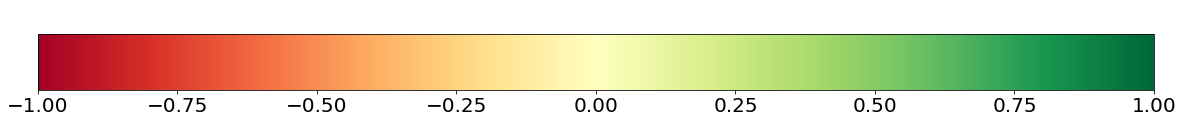

In [7]:
# Make colorbar. For whatever silly reason this needs to run twice to have the correct font size

fig, ax = plt.subplots(1, 1, figsize=(20,10),)

fraction = 1  # .05
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn'),
            ax=ax, pad=.05, fraction=fraction,
            orientation='horizontal'
)
ax.axis('off')

plt.rcParams.update({'font.size': 20})
plt.show()

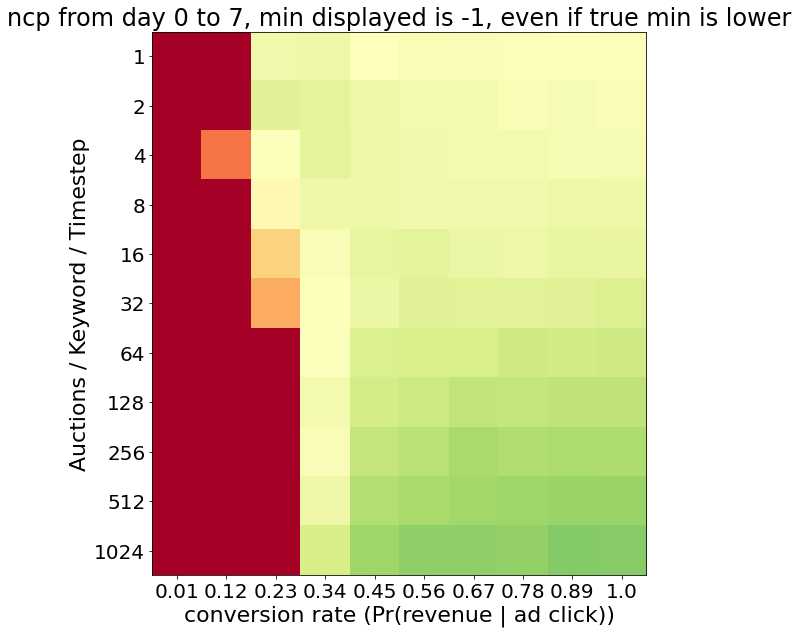

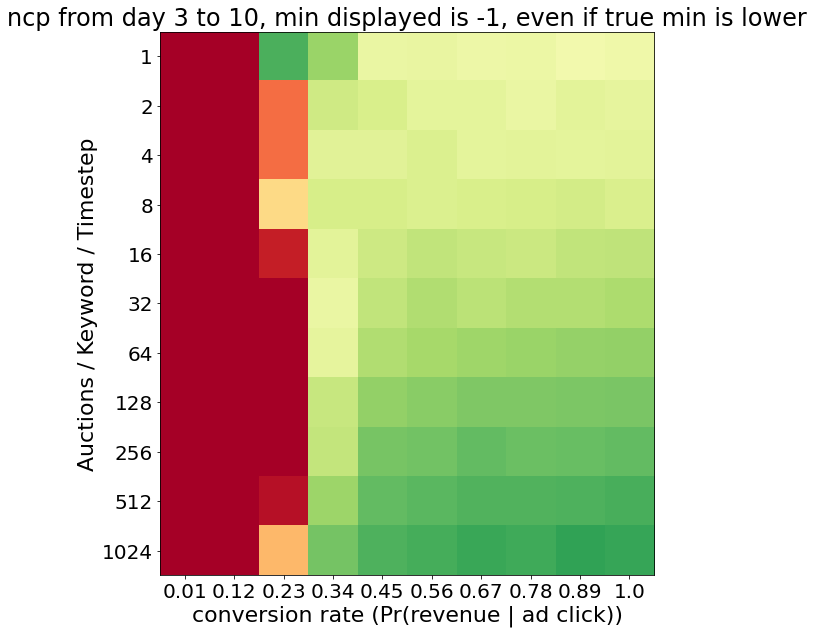

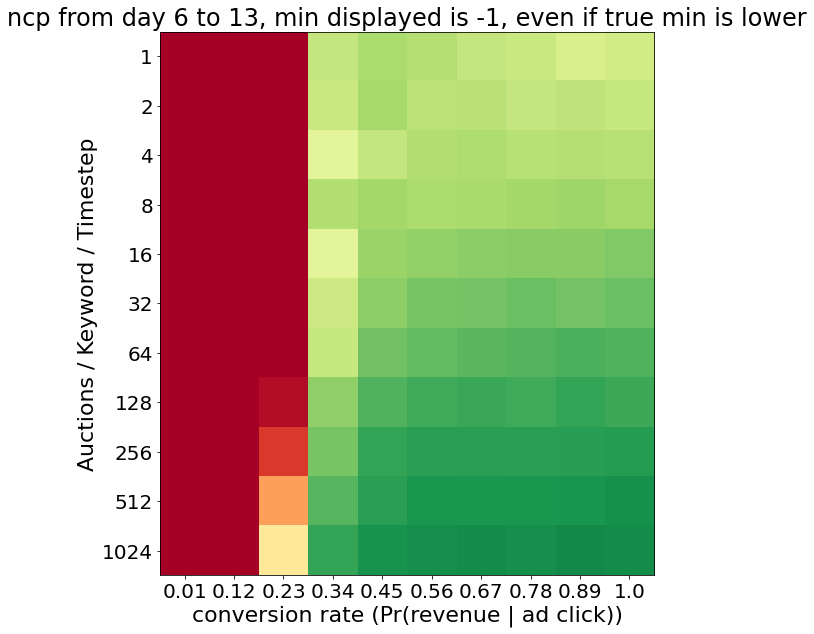

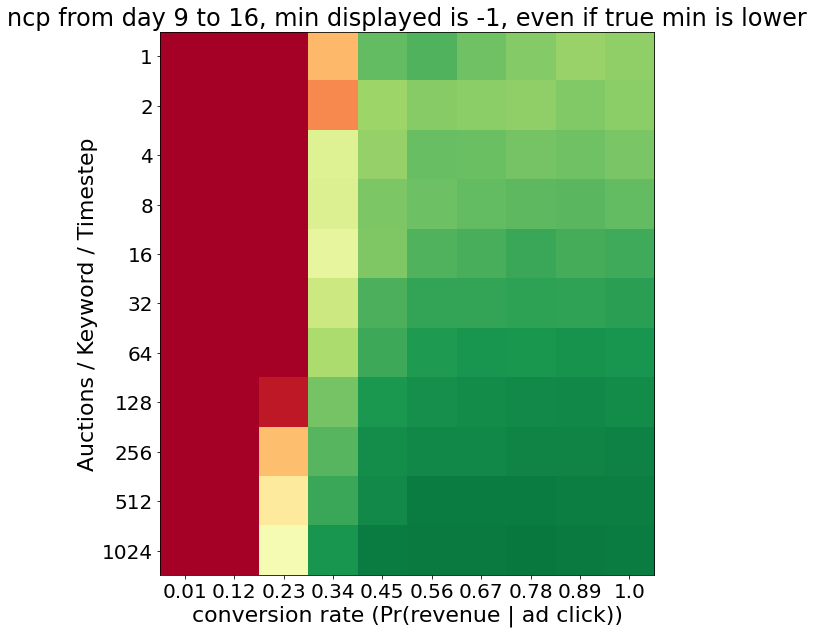

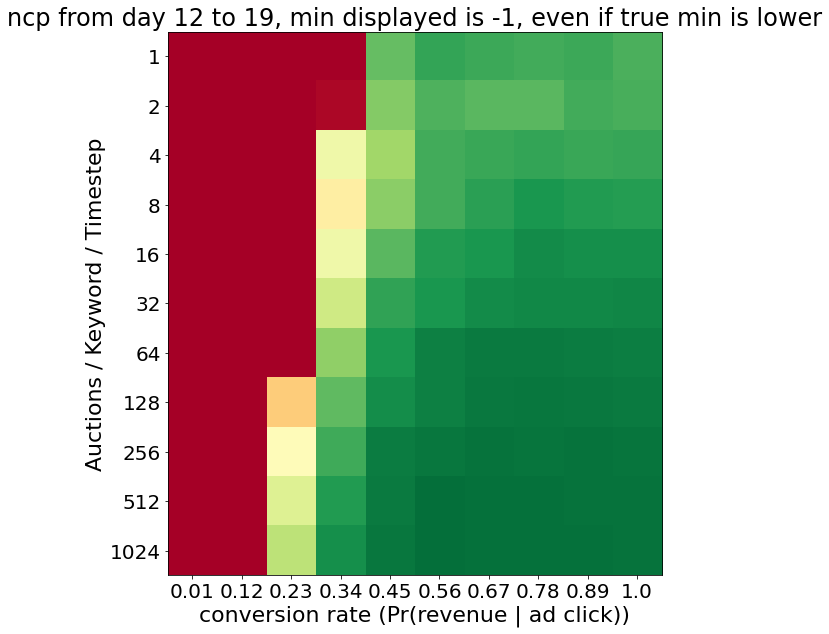

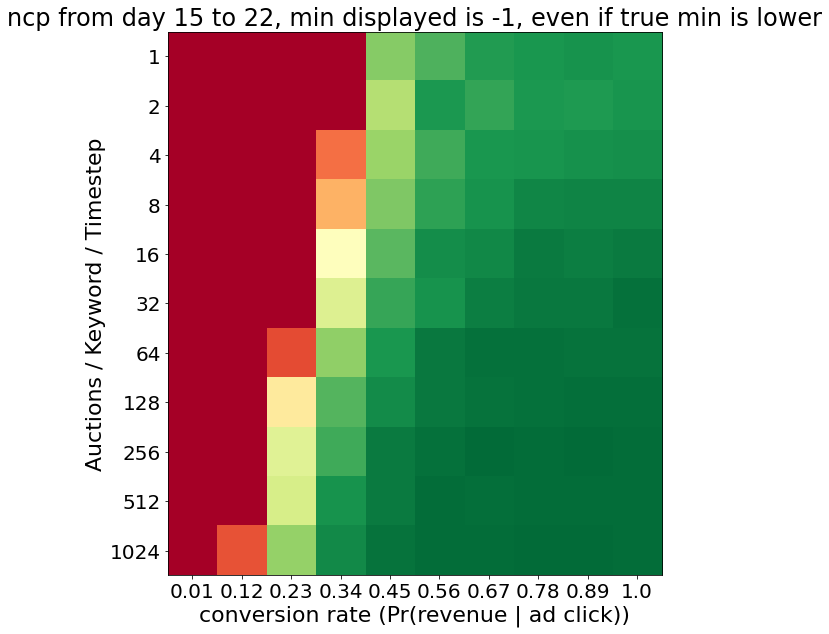

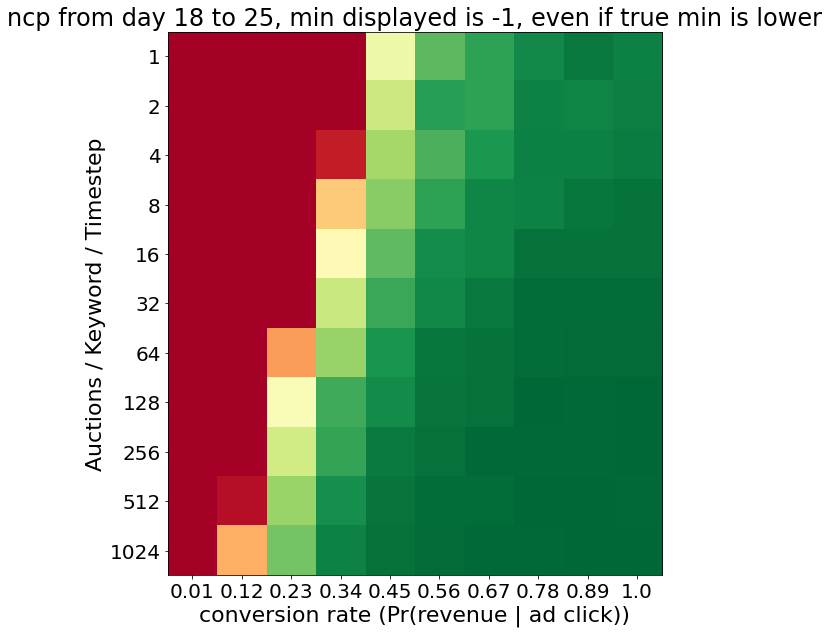

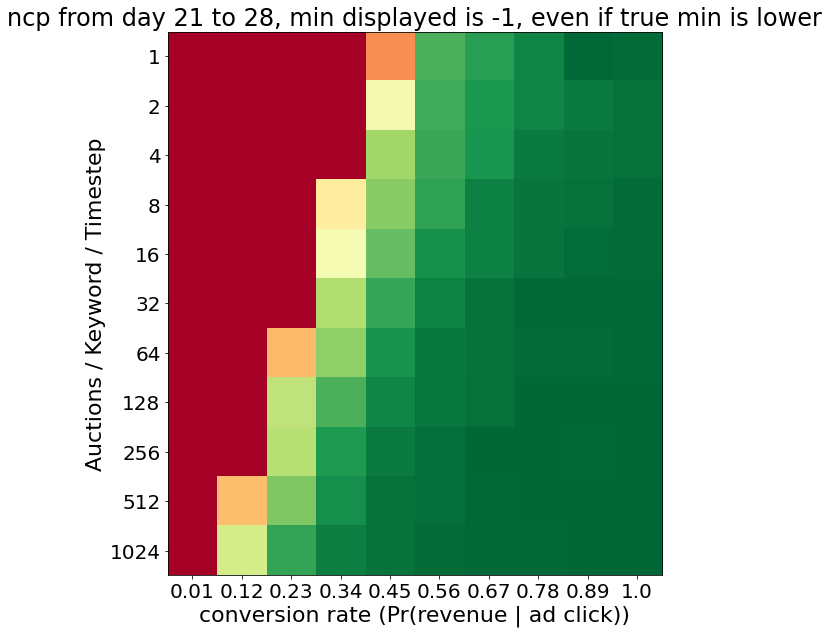

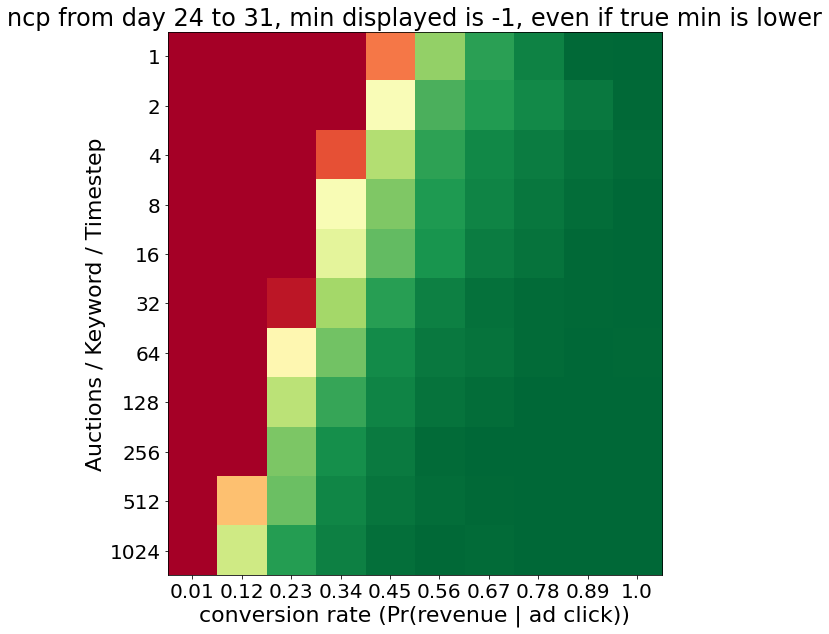

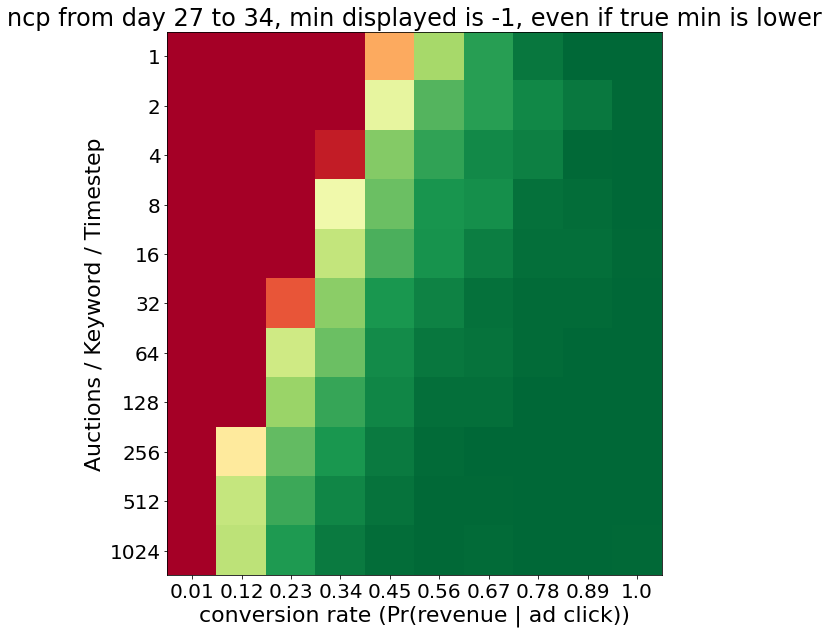

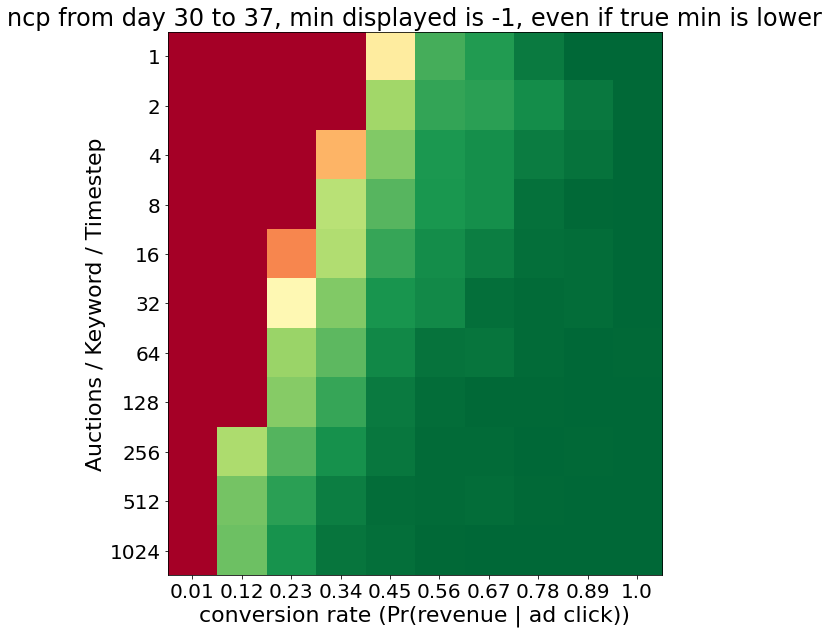

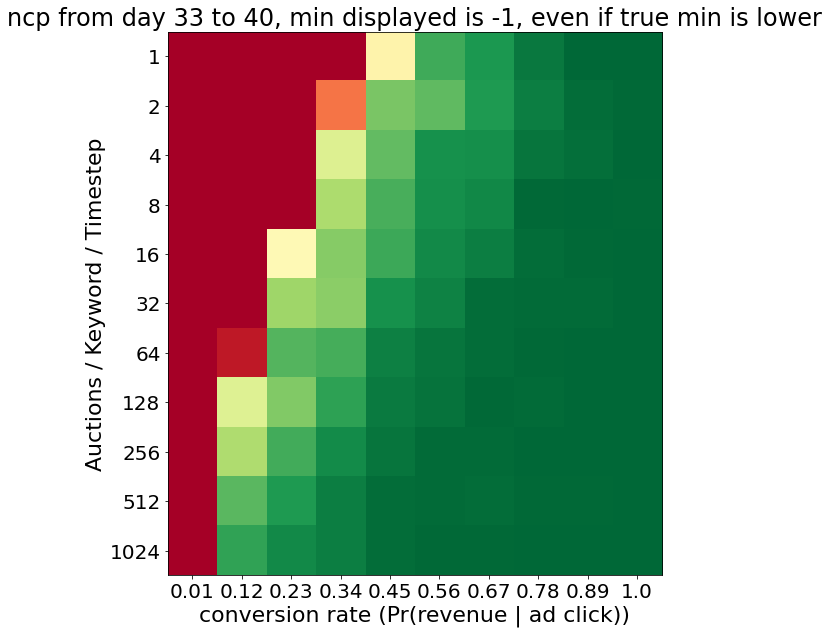

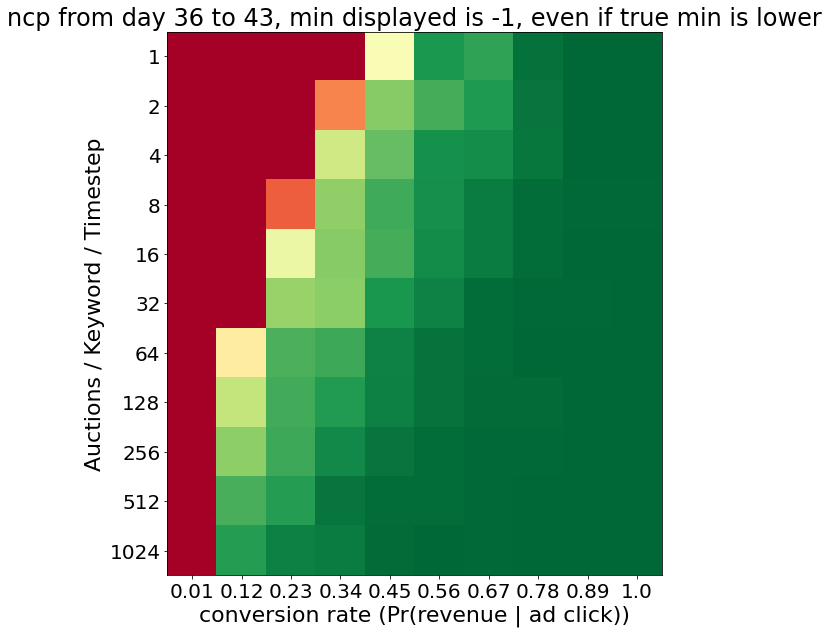

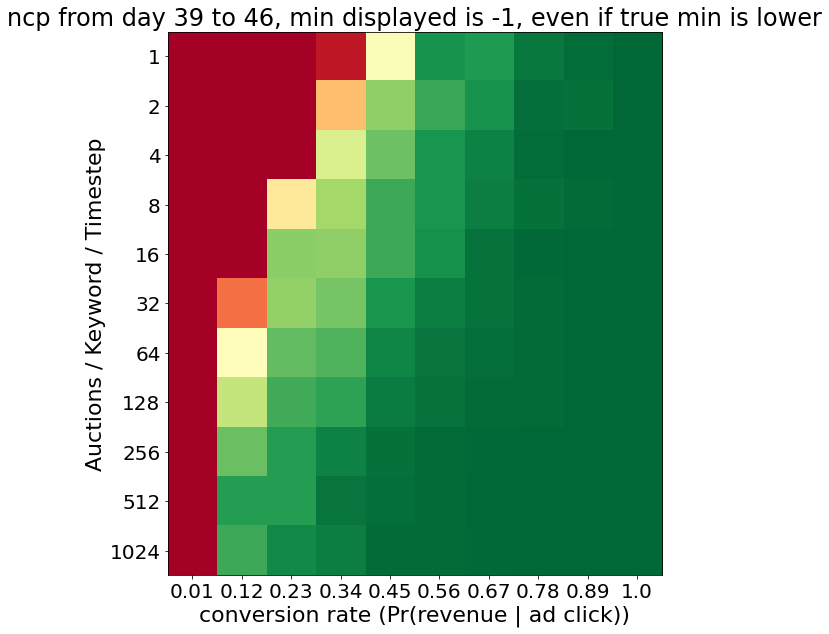

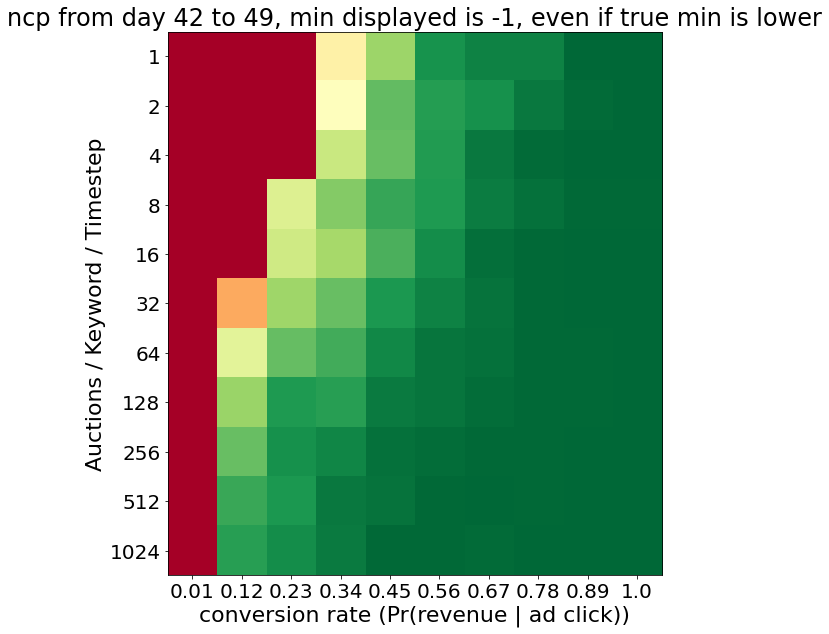

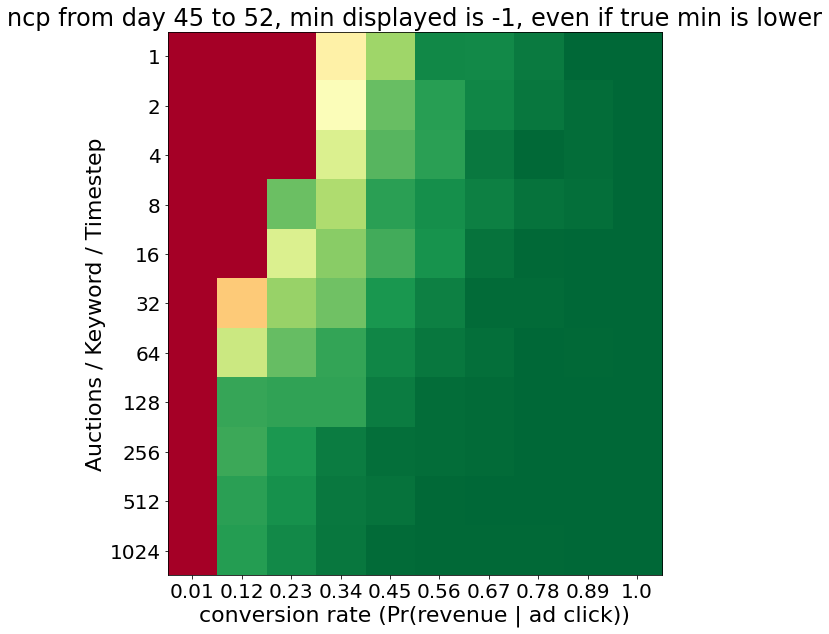

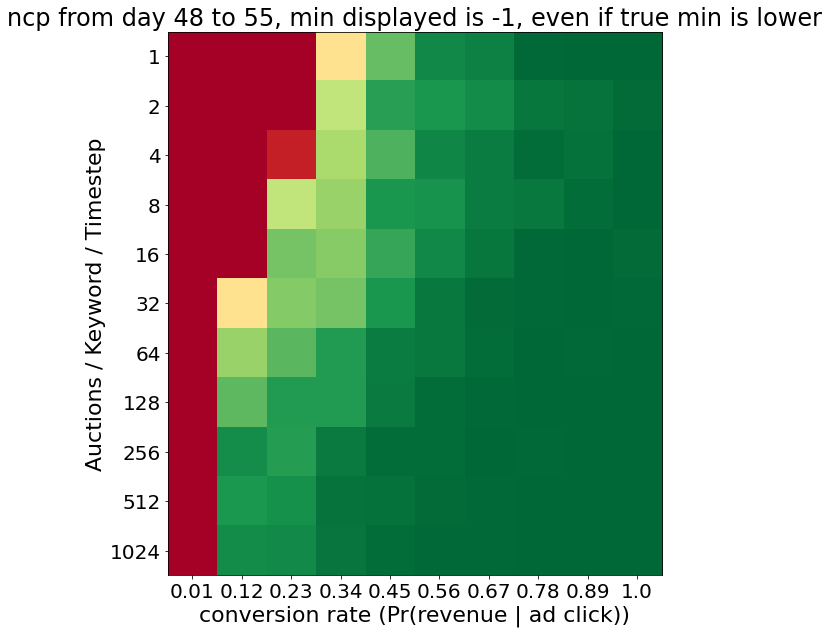

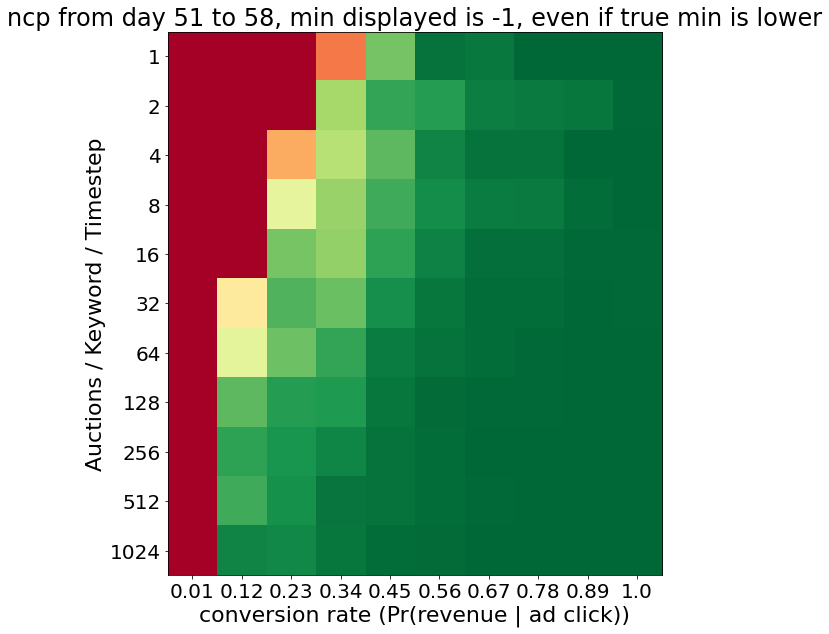

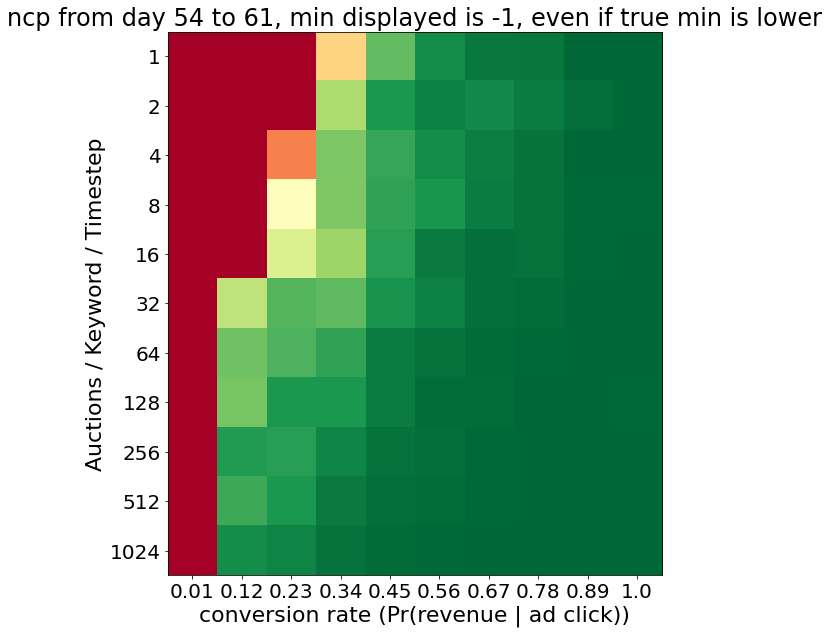

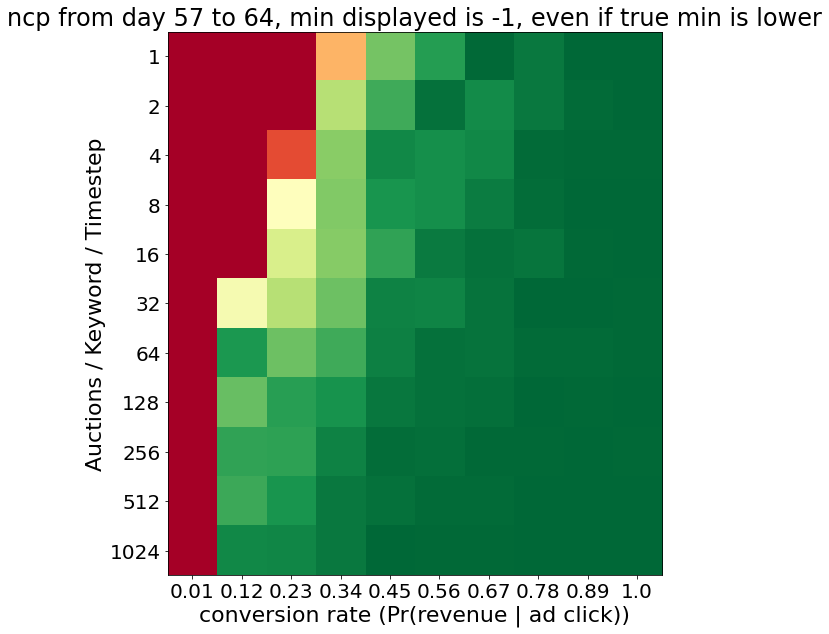

In [5]:
# slow implementation, but quick and dirty to see moving average of ncp and akncp over time. That kinda shows what the learning looks like for the baseline/whatever algo generated the data.
# None of these made it into the paper, but they're still kinda interesting. Suggest keeping only one of the ncp, akncp heatmap plots uncommented so you can see the single metric evolving in time. probably better as a gif or or something.
mean_volumes = [2**k for k in range(10+1)]
conversion_rates = np.linspace(0.01, 1.0, 10)
for start_step in range(0,60,3):
    end_step = start_step + 7
    sparsity_akncps, sparsity_ncps, median_expected_max_profit, median_profit = sparsity_results(mean_volumes, conversion_rates, num_keywords=100, start_step=start_step, end_step = end_step)

    # sparsity_heatmap(
    #     conversion_rates, 
    #     mean_volumes, 
    #     sparsity_akncps, 
    #     x_label = "conversion rate (Pr(revenue | ad click))", 
    #     y_label = "Auctions / Keyword / Timestep", 
    #     title= f"akncp from day {start_step} to {end_step}, min displayed is -1, even if true min is lower"
    # )

    sparsity_heatmap(
        conversion_rates, 
        mean_volumes, 
        sparsity_ncps, 
        x_label = "conversion rate (Pr(revenue | ad click))", 
        y_label = "Auctions / Keyword / Timestep", 
        title= f"ncp from day {start_step} to {end_step}, min displayed is -1, even if true min is lower"
    )

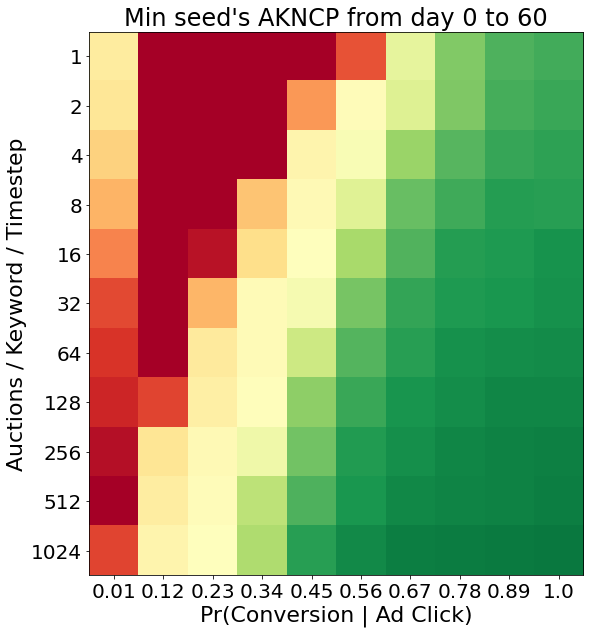

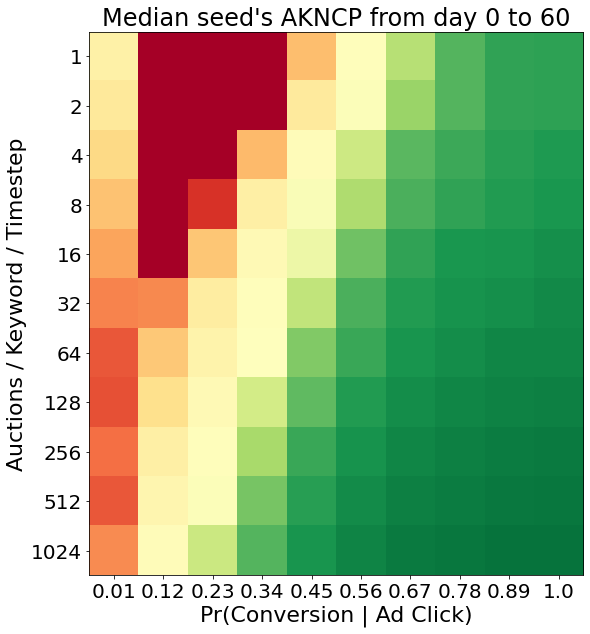

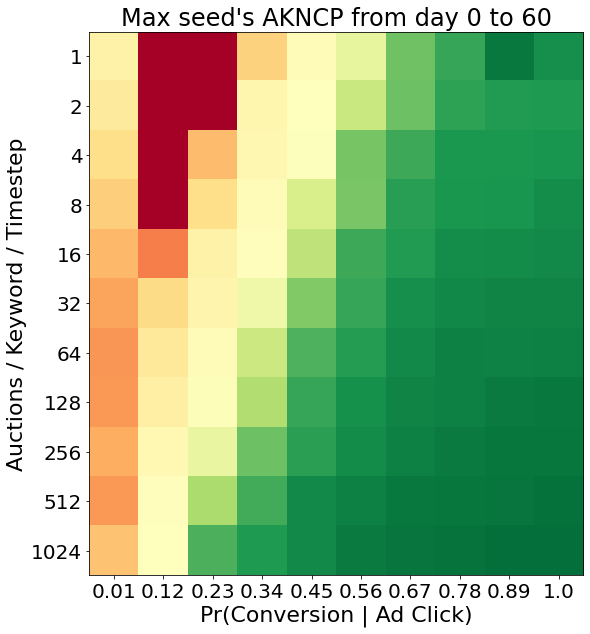

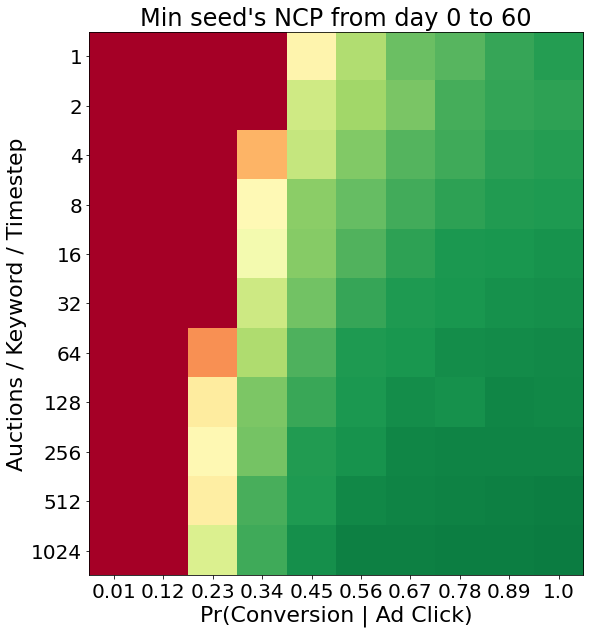

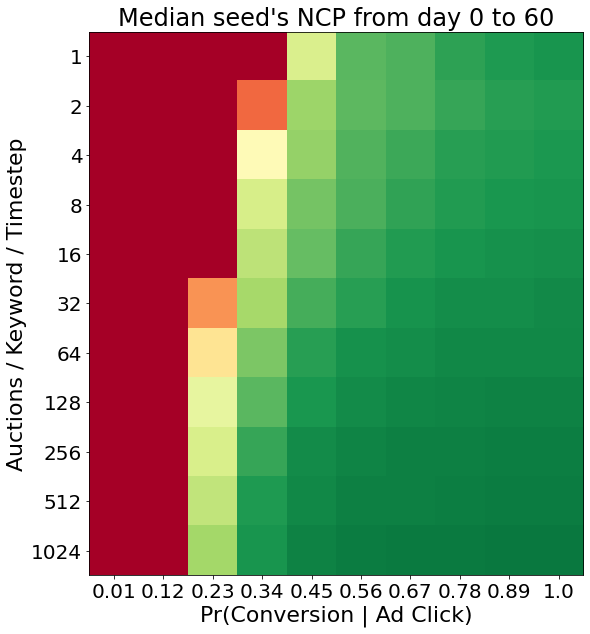

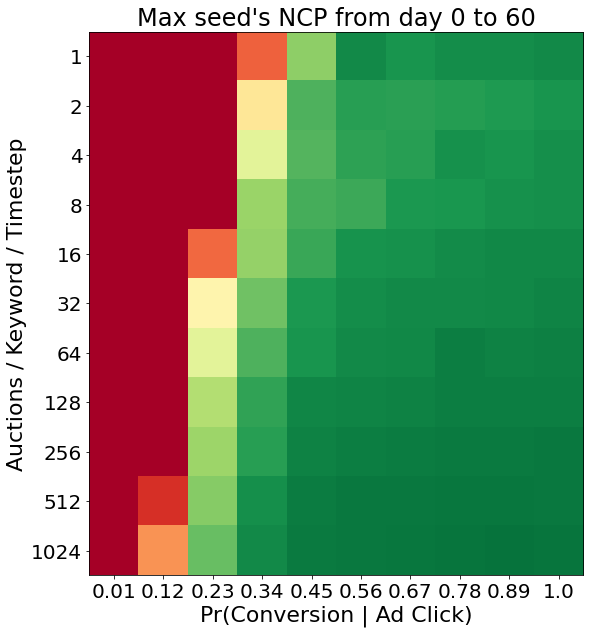

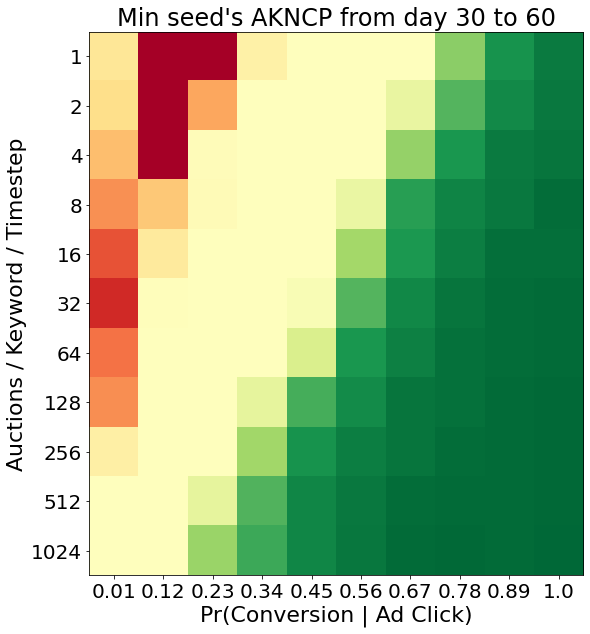

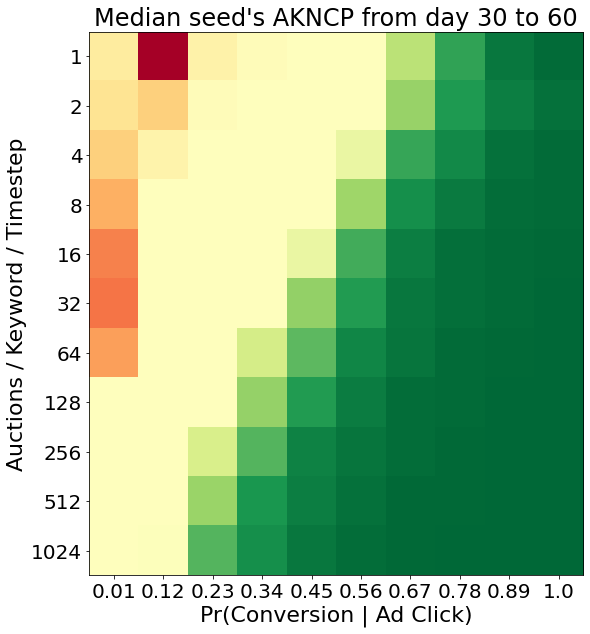

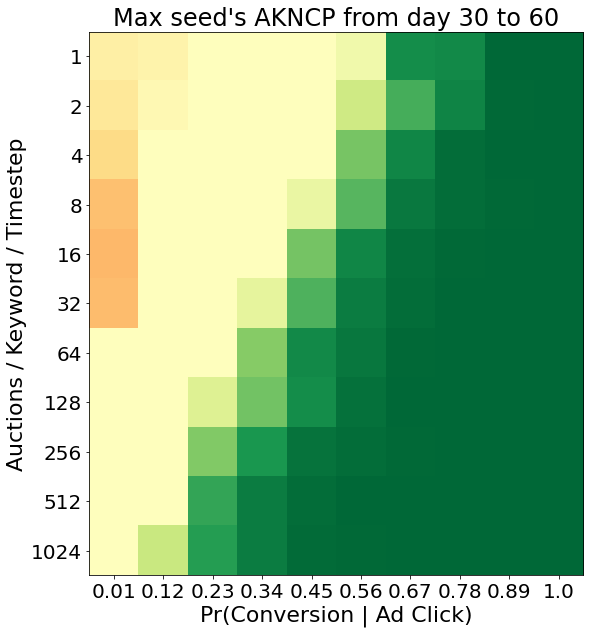

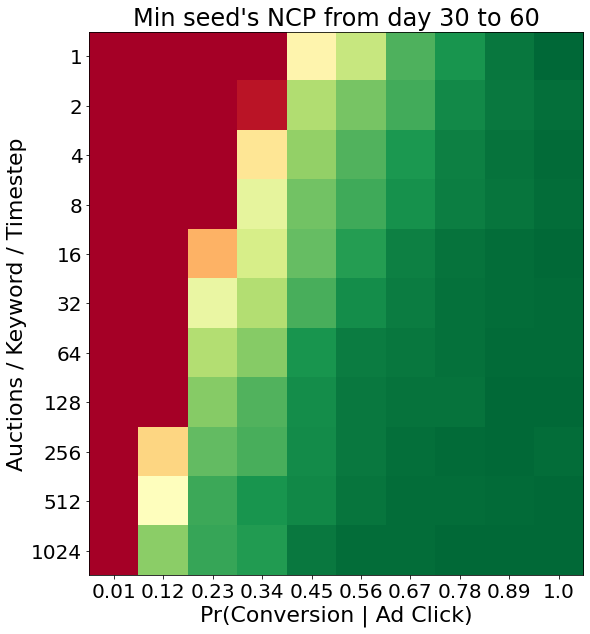

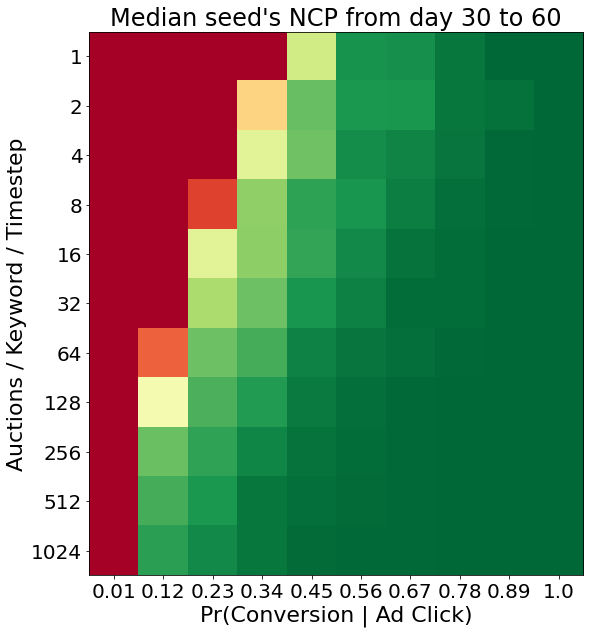

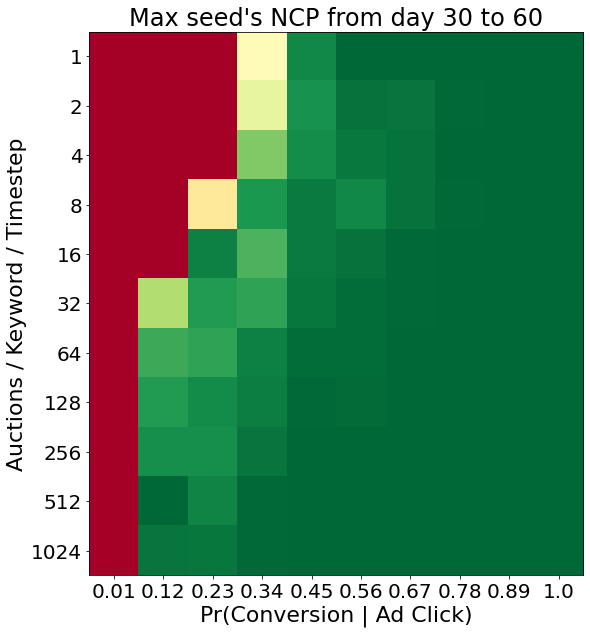

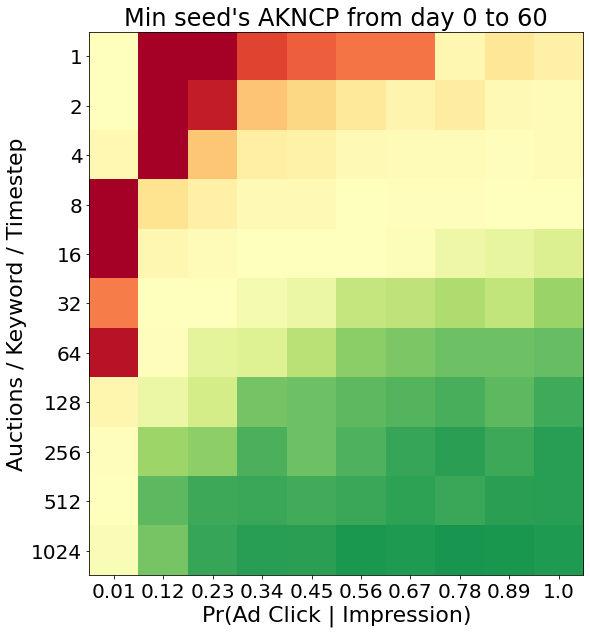

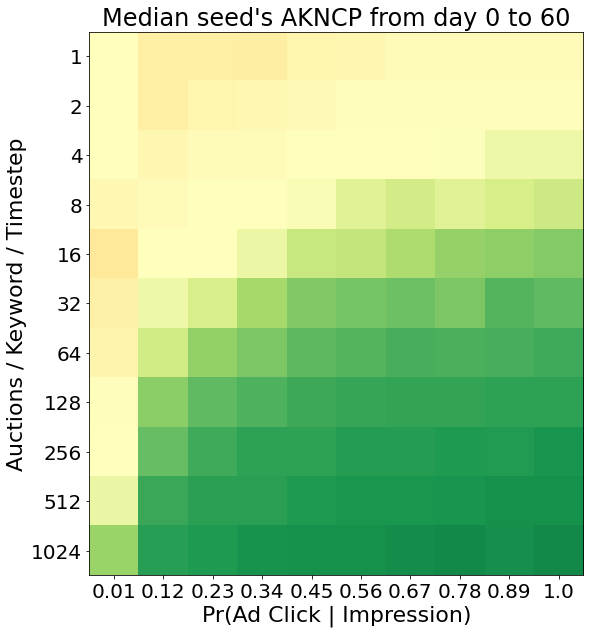

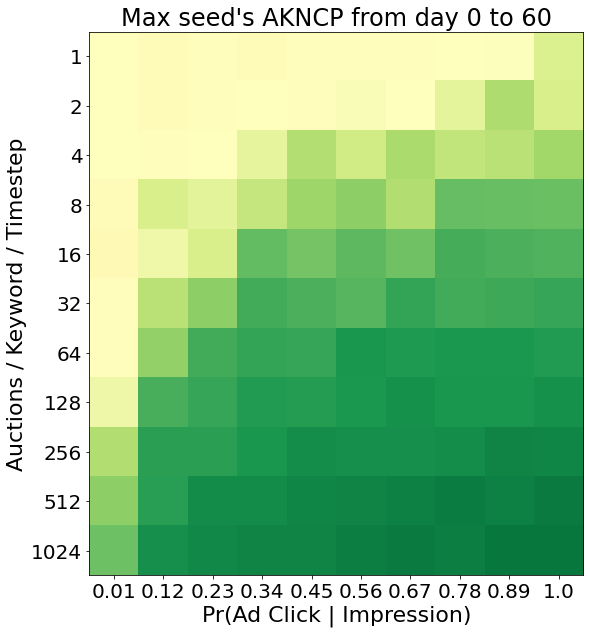

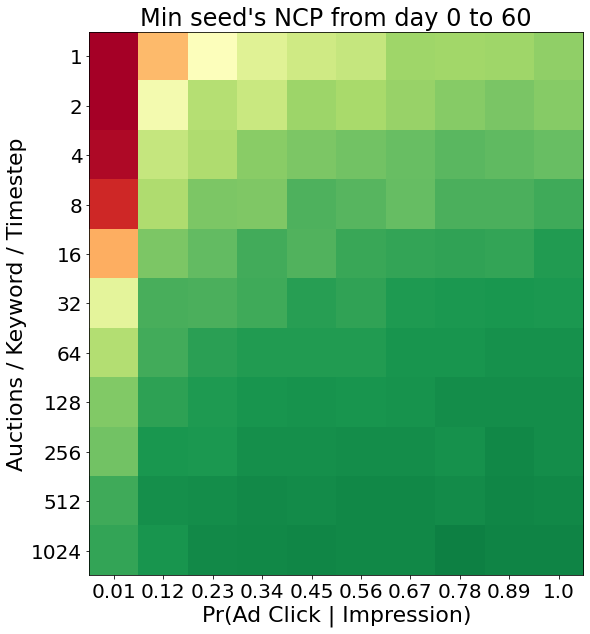

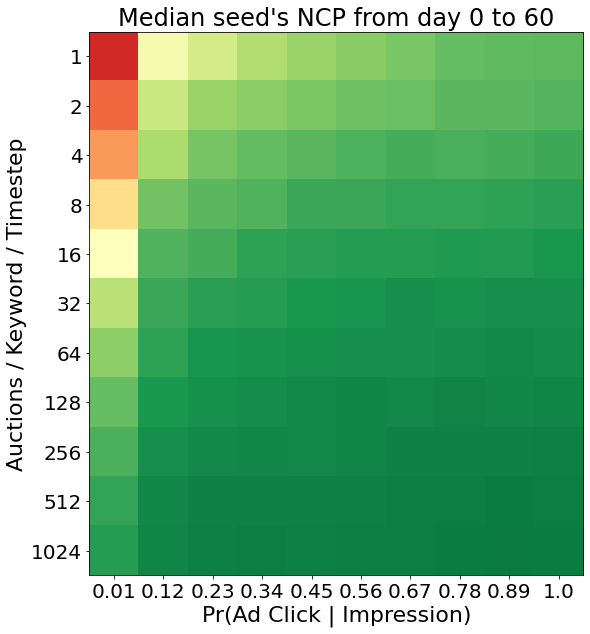

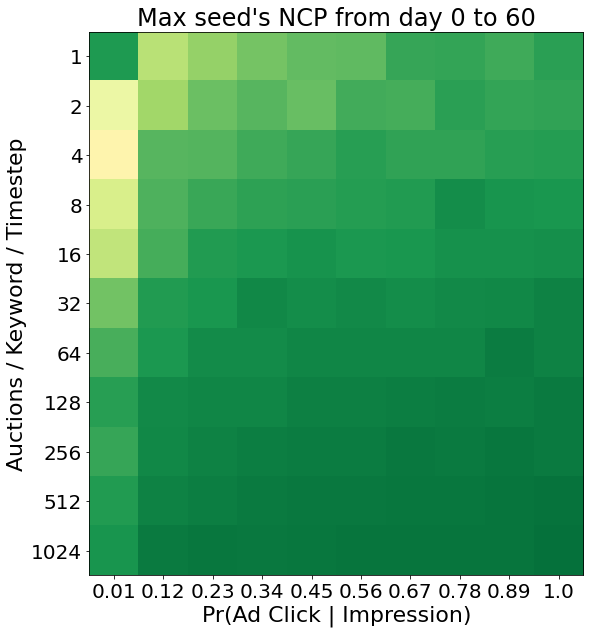

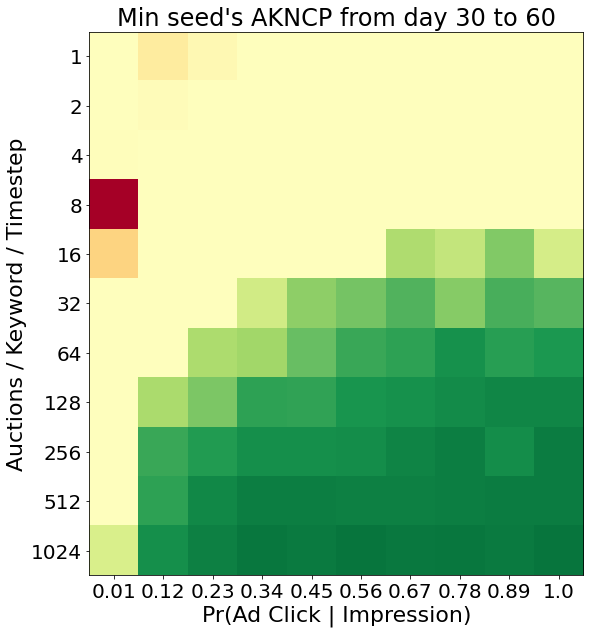

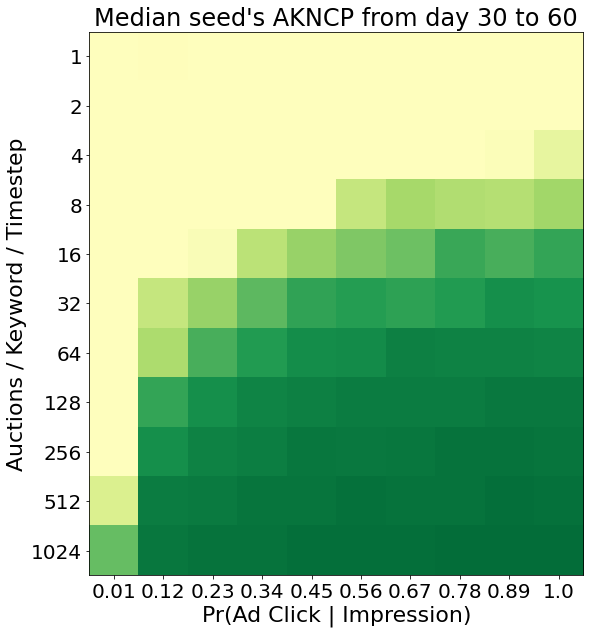

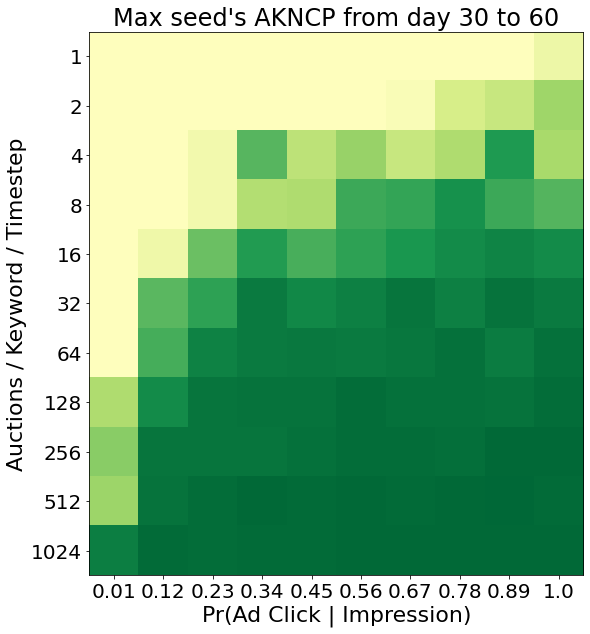

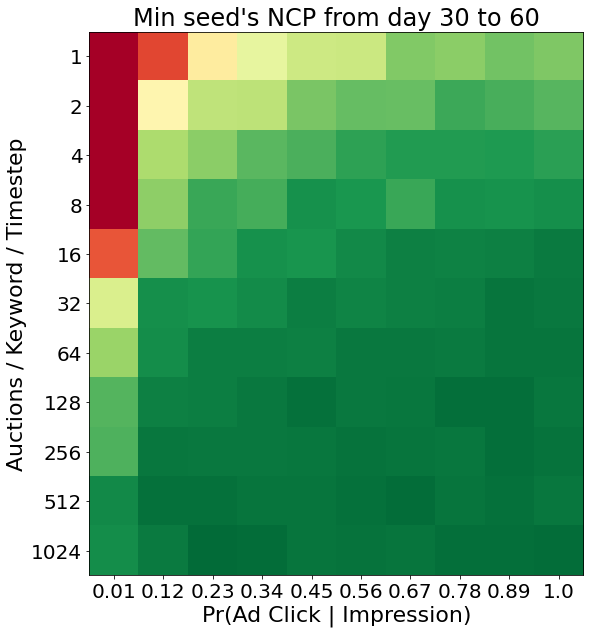

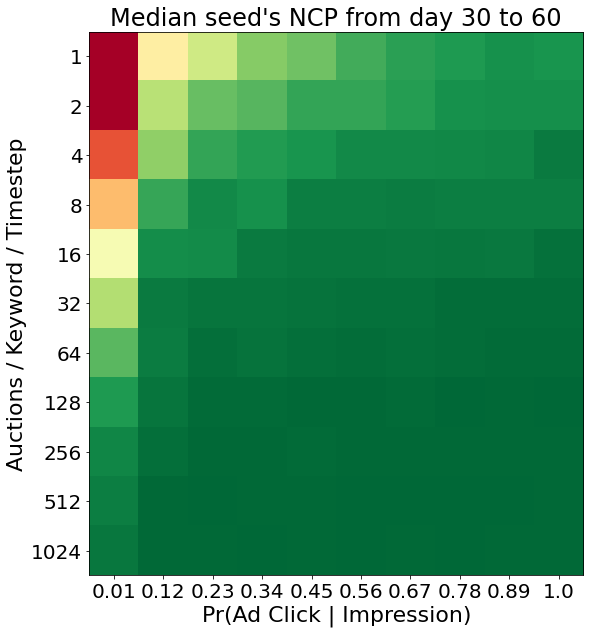

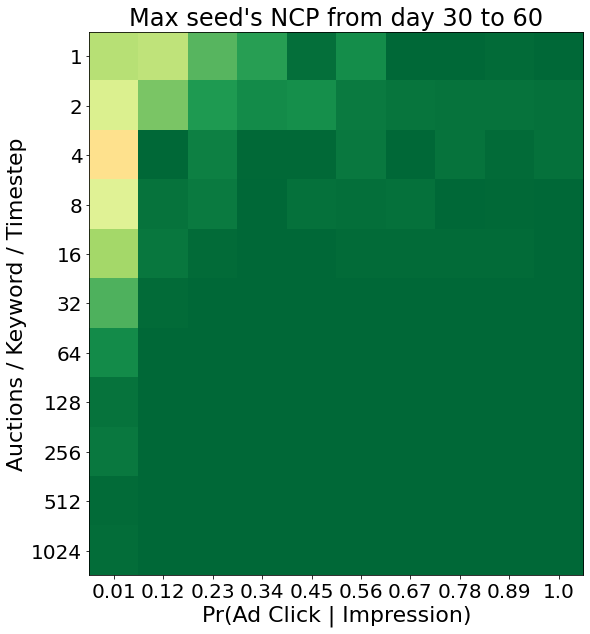

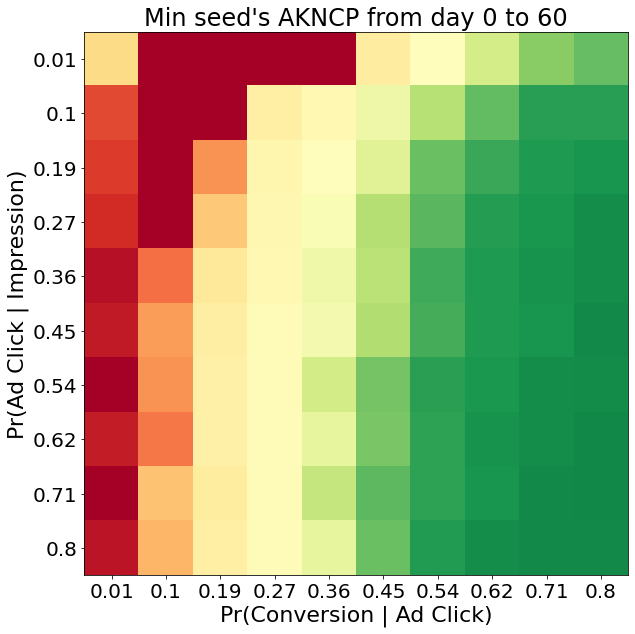

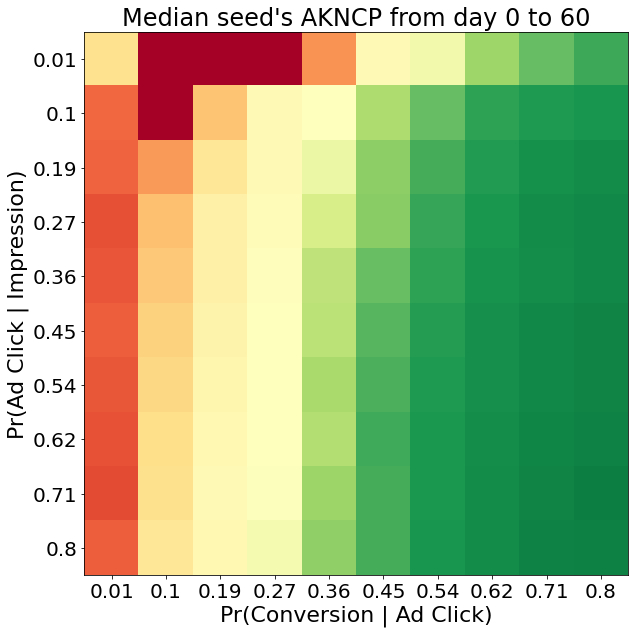

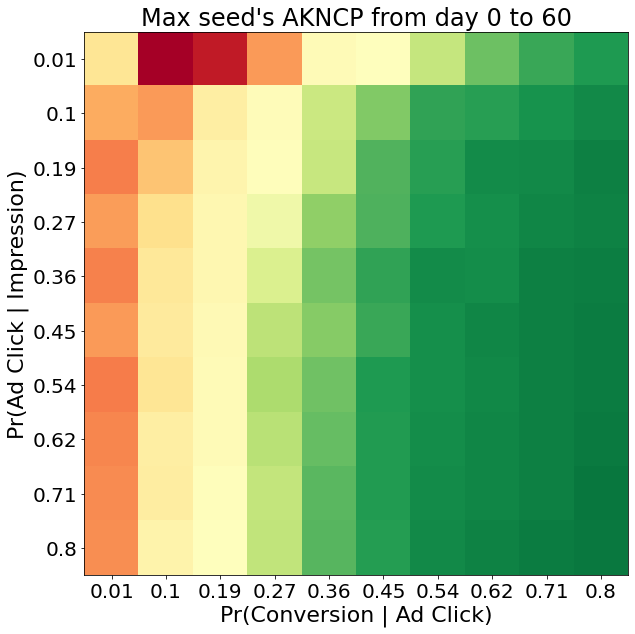

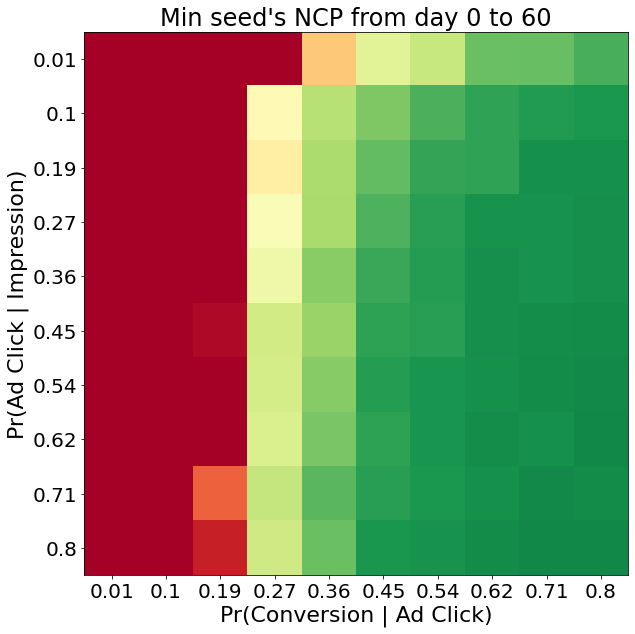

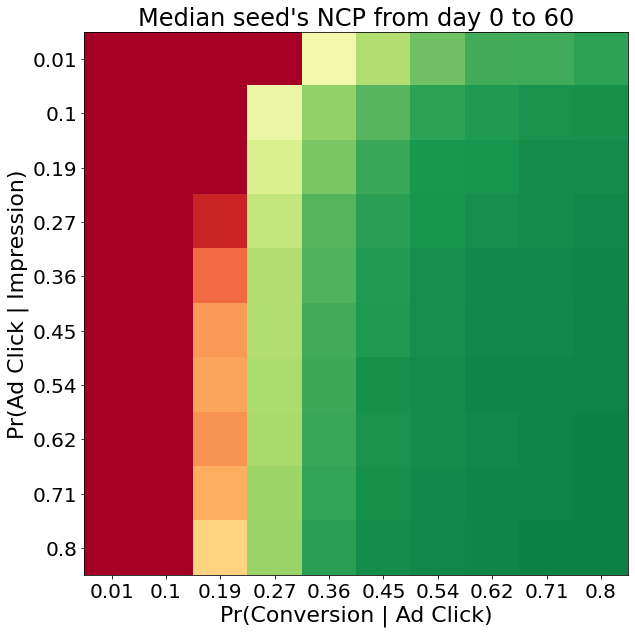

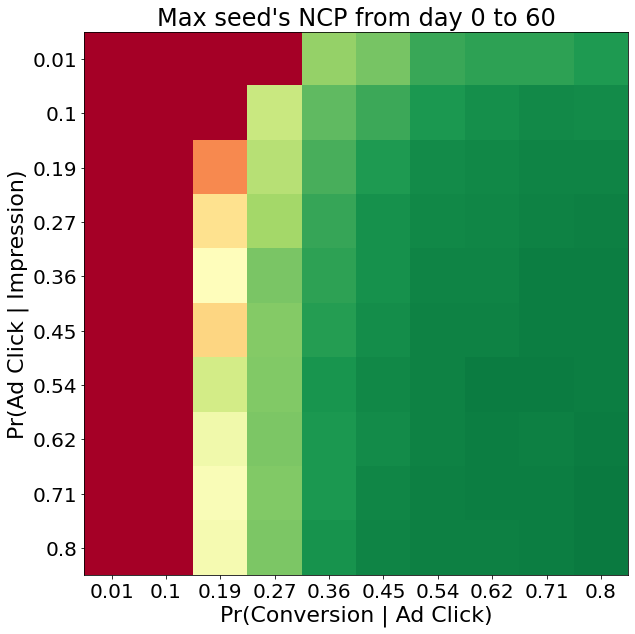

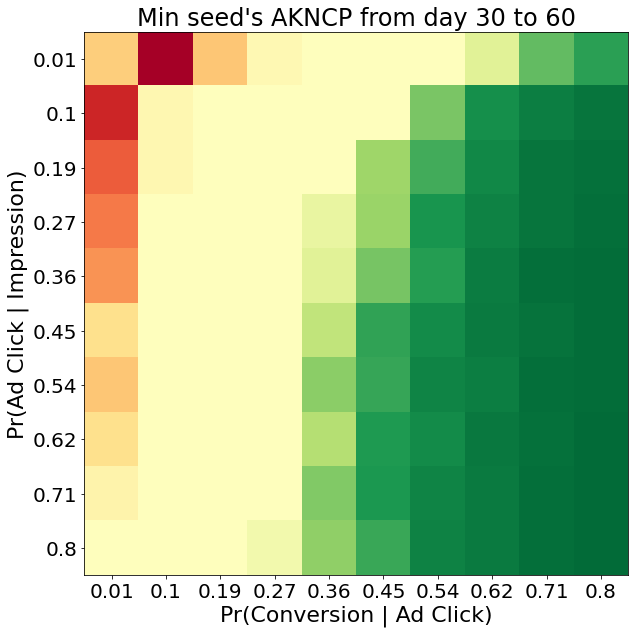

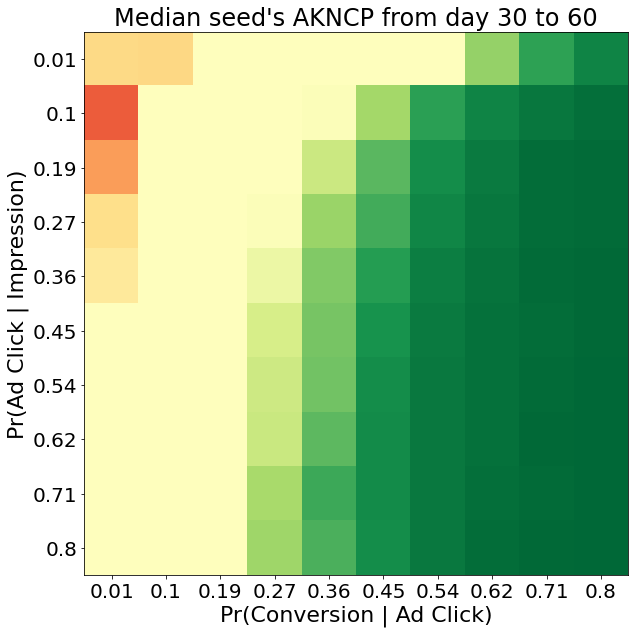

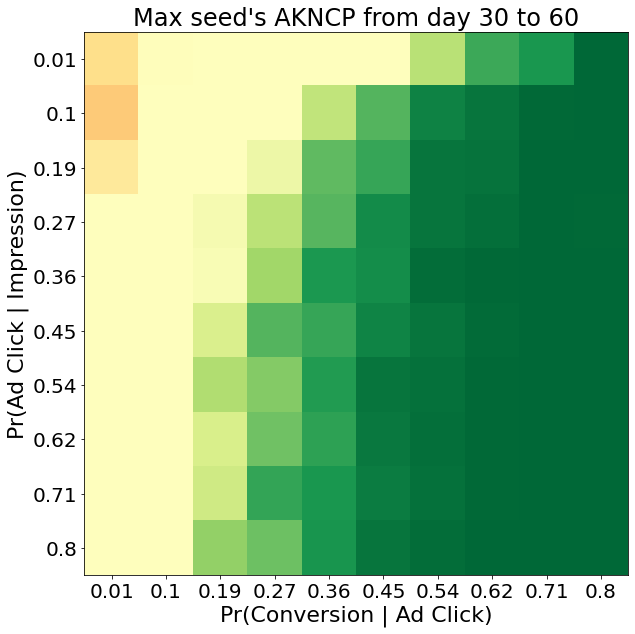

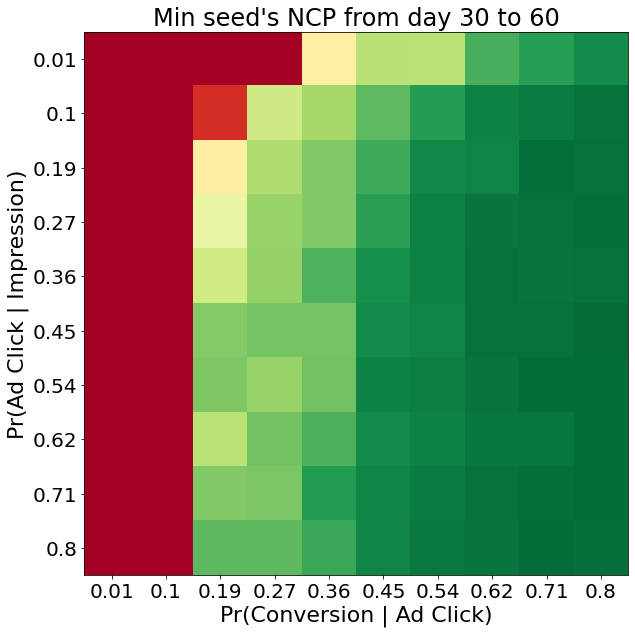

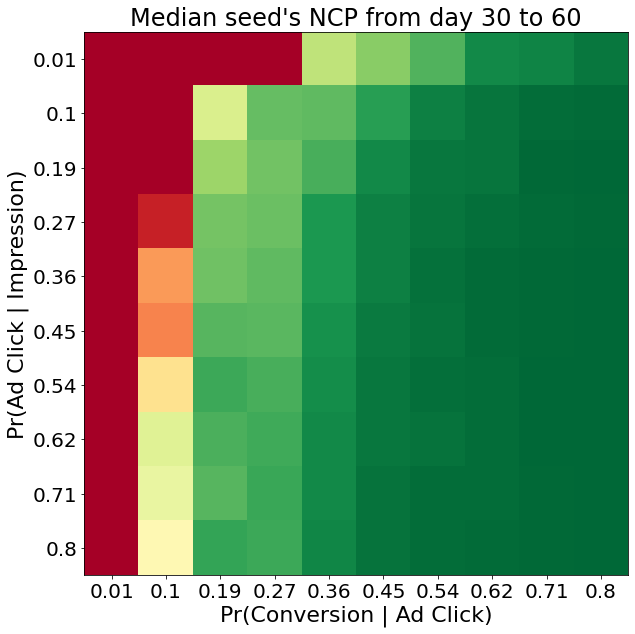

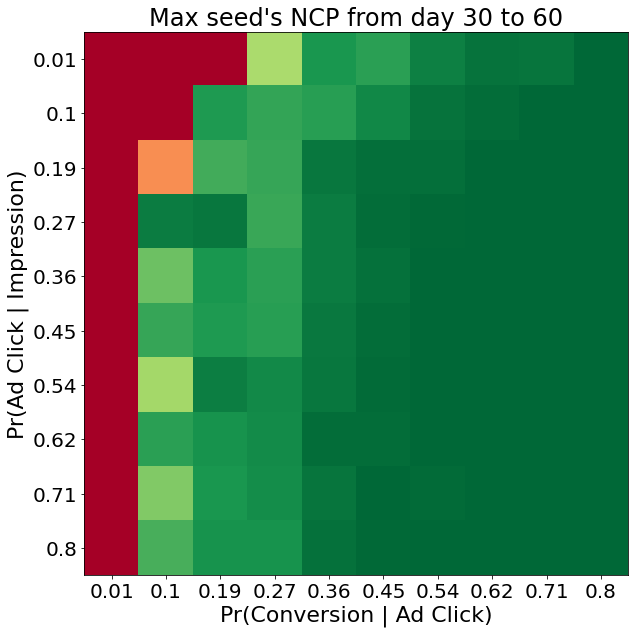

In [6]:
# make all the heatmaps for pairs of sparsity parameters:
# vol cvr
# vol ctr
# ctr cvr

# values to pull data from correct folders for each experiment
# and for the tickmarks on the heatmaps
ys_inits = [
    np.array([2**k for k in range(10+1)]), # vols
    np.array([2**k for k in range(10+1)]), # vols
    np.linspace(0.01, 0.8, 10), # ctrs
]
xs_inits = [
    np.linspace(0.01, 1.0, 10), # cvrs
    np.linspace(0.01, 1.0, 10), # ctrs
    np.linspace(0.01, 0.8, 10), # cvrs
]

# axes labels
CVRl = "Pr(Conversion | Ad Click)"
CTRl = "Pr(Ad Click | Impression)"
voll = "Auctions / Keyword / Timestep"
xlabels = [CVRl, CTRl, CVRl,]
ylabels = [voll, voll, CTRl,]

# locations to pull the experiment data from
results_folders = [
    "/experiment_results/",
    "/vol_bctr_experiment_results/",
    "/bctr_sctr_experiment_results/",
]
for ys_init, xs_init, ylabel, xlabel, results_folder in zip(ys_inits, xs_inits, ylabels, xlabels, results_folders):
    for start_step in [0, 30]:
        sparsity_akncps, sparsity_ncps, _,_ = sparsity_results(
            ys_init, xs_init, num_keywords=100, start_step=start_step, end_step = 60, results_folder=results_folder
        )
        sparsity_akncps_M, sparsity_ncps_M, sparsity_akncps_m, sparsity_ncps_m,= sparsity_results_min_max(
            ys_init, xs_init, num_keywords=100, start_step=start_step, end_step = 60, results_folder=results_folder
        )
        if results_folder=="/bctr_sctr_experiment_results/":
            ys = np.round(ys_init, 2)
            xs = np.round(xs_init, 2)
        else:
            ys = ys_init
            xs = xs_init

        # draw the heatmaps
        sparsity_heatmap(
            xs, 
            ys, 
            sparsity_akncps_m, 
            x_label = xlabel, 
            y_label = ylabel, 
            title= f"Min seed's AKNCP from day {start_step} to 60"
        )
        sparsity_heatmap(
            xs, 
            ys, 
            sparsity_akncps, 
            x_label = xlabel, 
            y_label = ylabel, 
            title= f"Median seed's AKNCP from day {start_step} to 60"
        )
        sparsity_heatmap(
            xs, 
            ys, 
            sparsity_akncps_M, 
            x_label = xlabel, 
            y_label = ylabel, 
            title= f"Max seed's AKNCP from day {start_step} to 60"
        )
        sparsity_heatmap(
            xs, 
            ys, 
            sparsity_ncps_m, 
            x_label = xlabel, 
            y_label = ylabel, 
            title= f"Min seed's NCP from day {start_step} to 60"
        )
        sparsity_heatmap(
            xs, 
            ys,
            sparsity_ncps, 
            x_label = xlabel, 
            y_label = ylabel, 
            title= f"Median seed's NCP from day {start_step} to 60"
        )
        sparsity_heatmap(
            xs, 
            ys, 
            sparsity_ncps_M, 
            x_label = xlabel, 
            y_label = ylabel, 
            title= f"Max seed's NCP from day {start_step} to 60"
        )